In [6]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.3.3, Matplotlib version: 3.4.3


In [3]:
root_name = '/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/Cl_band/out_Pk'

with open(root_name+'.paramnames', 'w') as outfile:
    with open(root_name+'.txt') as infile:
        for i, line in enumerate(infile):
            if i==0 and line.startswith('#'):
                params_names_str = line.split()
                for j in params_names_str:
                    if str(j) != '#' and str(j) != 'weight' and str(j) != 'minuslogpost':
                        outfile.write(str(j))
                        outfile.write('\n')
                        
                        
samples = getdist.mcsamples.loadMCSamples(root_name)

/gpfs/home/kuzhong/work/cocoa_AS2/Cocoa/projects/AStress/Cl_band/out_Pk.txt
Removed no burn in


In [4]:
len_Pk_range = 100 # How much points in the output
log10_Pk_range     = np.linspace(-2.0, -1.0, len_Pk_range) #range of Pk in log10 base
Pk_range           = np.flip(np.power(10.0, log10_Pk_range)) #real k values (not k/h in usual plots)

Pk_means   = np.empty(0)
Pk_upper_1 = np.empty(0)
Pk_lower_1 = np.empty(0)
Pk_upper_2 = np.empty(0)
Pk_lower_2 = np.empty(0)


stats = samples.getMargeStats()
for i, kk in enumerate(Pk_range):
    lims = stats.parWithName('Pk_'+str(i)).limits
    means = stats.parWithName('Pk_'+str(i)).mean
    
    Pk_means   = np.append(Pk_means, np.array(means))
    Pk_upper_1 = np.append(Pk_upper_1, np.array(means))
    Pk_lower_1 = np.append(Pk_lower_1, np.array(lims[0].lower))
    Pk_upper_2 = np.append(Pk_upper_2, np.array(lims[1].upper))
    Pk_lower_2 = np.append(Pk_lower_2, np.array(lims[1].lower))
    

Text(0, 0.5, 'Pk')

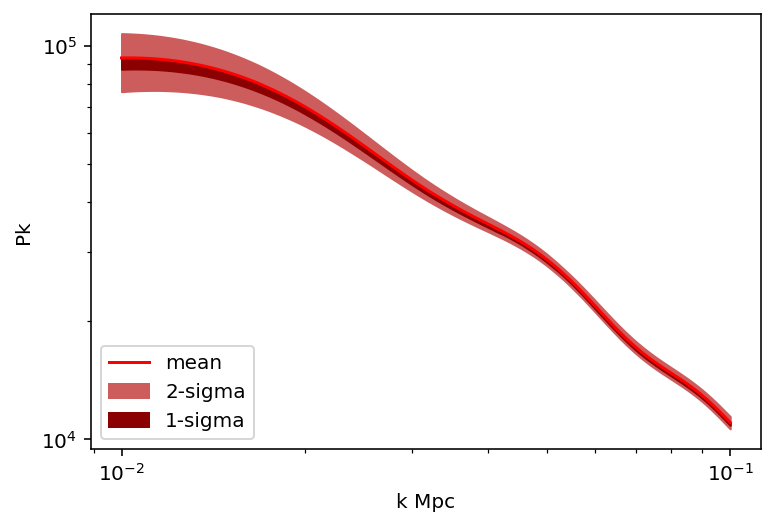

In [9]:
plt.loglog(Pk_range, Pk_means,  color = 'red', linestyle = 'solid', label = 'mean')
#plt.loglog(ell, Cl_upper_1,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_lower_1,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_upper_2,  color = 'red', linestyle = 'solid')
#plt.loglog(ell, Cl_lower_2,  color = 'red', linestyle = 'solid')

plt.fill_between(Pk_range, Pk_upper_2, Pk_lower_2, color = 'indianred', label = '2-sigma')
plt.fill_between(Pk_range, Pk_upper_1, Pk_lower_1, color = 'darkred', label = '1-sigma')
#plt.fill_between(ell, Cl_upper_2, Cl_lower_2, color = 'indianred')


#plt.xlim([3, 100])
#plt.ylim(600,4000)
plt.legend(loc="lower left")
plt.xlabel('k Mpc')
plt.ylabel('Pk')